In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install

In [61]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

# Lectura y transformación de datos

In [36]:
datos = pd.read_excel("datos/Export.xlsx", skiprows=7)
datos.head(5)

,Num,Country,Company,Total operating revenue,Operational Status,City,Business Description/Products,Industry (NAICS),Main Activities (NAICS),Secondary Activities (NAICS),...,% Change from 3 Year Low,% Change from 5 Year Low,Fiscal Year,Audited,Consolidated,Source,EMIS ID,CO-NIT,ISIN,Ticker Symbol
0,1,Colombia,Ecopetrol S.A.,1.427485e+08,Operational,Bogota D.C.,Ecopetrol S.A. was founded in 1948 and is the ...,Natural Gas Extraction(21113); Crude Petroleum...,Natural Gas Extraction(21113); Crude Petroleum...,NaN,...,-0.4,-0.42,2023.0,Audited,Consolidated,Superfinanciera – IFRS,1192567.0,899999068,"COC04PA00016, US2791581091",ECOPETROL
1,2,Colombia,Organizacion Terpel S.A.,3.625272e+07,Operational,Bogota D.C.,Organizacion Terpel S.A. distributes and sells...,Petroleum and Petroleum Products Merchant Whol...,Petroleum and Petroleum Products Merchant Whol...,NaN,...,NaN,NaN,2023.0,Audited,Consolidated,Superfinanciera – IFRS,1208163.0,830095213,COG20PA00021,TERPEL
2,3,Colombia,D1 S A S,1.742413e+07,Operational,Bogota D.C.,"D1 S.A.S, with its brand of Tiendas D1, was cr...",Grocery Stores(4451),Grocery Stores(4451),NaN,...,NaN,NaN,2023.0,Audited,Individual,Superintendencia de Sociedades - IFRS Financia...,3524378.0,900276962,,
3,4,Colombia,Enel Colombia S.A. E.S.P.,1.672487e+07,Operational,Bogota D.C.,Emgesa S.A. ESP (formerly Central Hidroelectri...,Electric Power Generation(22111),Electric Power Generation(22111),NaN,...,NaN,NaN,2023.0,Audited,Consolidated,Superfinanciera – IFRS,1193219.0,860063875,,
4,5,Colombia,Drummond Ltd,1.542435e+07,Operational,Bogota D.C.,Drummond Ltd. is a subsidiary of the U.S compa...,Support Activities for Oil and Gas Operations(...,Support Activities for Oil and Gas Operations(...,NaN,...,NaN,NaN,2023.0,Audited,Individual,Superintendencia de Sociedades - IFRS Financia...,1192247.0,800021308,,


In [37]:
datos = datos[0:10000]
datos = datos.loc[:,("Company", "Property, plant and equipment", "Cash and Cash Equivalents", "Import", "Export", "Net Sales Revenue Trend (%)", "Operating Profit Trend (%)")]

In [38]:
datos.columns

Index(['Company', 'Property, plant and equipment', 'Cash and Cash Equivalents',
       'Import', 'Export', 'Net Sales Revenue Trend (%)',
       'Operating Profit Trend (%)'],
      dtype='object')

In [39]:
datos.shape

(10000, 7)

In [40]:
datos.head()

,Company,"Property, plant and equipment",Cash and Cash Equivalents,Import,Export,Net Sales Revenue Trend (%),Operating Profit Trend (%)
0,Ecopetrol S.A.,95171301.60,12336115.05,"UK (4.81%), Philippines, NL (4.66%), Austria, ...","AU (0.06%), NL (1.84%), MY (2.39%), BN (0.25%)...",-10.28,-30.69
1,Organizacion Terpel S.A.,3939357.24,916490.75,"Philippines, NL (0.04%), Belgium, KR (1.6%), C...","UK (0.04%), NL (47.11%), JM (0.17%), EC (3.59%...",2.17,10.06
2,D1 S A S,3379990.01,718512.83,"UK (1.1%), ID (0.82%), EC (22.67%), PT (1.16%)...",EC (100%),24.88,1.75
3,Enel Colombia S.A. E.S.P.,21758779.81,1629477.08,"Tunisia, HK (0.05%), AT (0.37%), TW (0.02%), S...","PA (99.92%), US (0.08%)",37.18,-3.57
4,Drummond Ltd,5480302.25,169861.35,"AT (0.04%), DK (0.07%), JP (2.54%), Malta, IT ...","NL (16.6%), HK (0.05%), TW (3.98%), KR (5.43%)...",1.55,6.54


In [41]:
datos.to_csv("datos/Pruebas.csv")

In [44]:
# Función para extraer los países y porcentajes con expresiones regulares
def extract_countries_values_regex(column):
    country_dict = {}
    for row in column.dropna():
        # Buscar todas las ocurrencias del patrón 'PAIS (Porcentaje%)' o 'PAIS'
        matches = re.findall(r'([A-Za-z\s]+)(?:\s*\(([\d.]+)%\))?', row)
        for country, percentage in matches:
            country = country.strip()
            if percentage:
                percentage = float(percentage)
            else:
                percentage = 0.0  # Si no hay porcentaje, asignamos 0.0
            country_dict[country] = country_dict.get(country, 0) + percentage
    return country_dict

# Función para extraer los porcentajes de un item
def extract_percentage_from_item(item):
    try:
        # Verificar si el item contiene un porcentaje, de lo contrario devolver 0.0
        if '(' in item and ')' in item:
            return float(item.split('(')[1].replace('%', '').replace(')', '').strip())
        else:
            return 0.0
    except (IndexError, ValueError):
        return 0.0  # Manejo de errores si no es posible convertir el porcentaje

# Extraer países y sus porcentajes de las columnas de Import y Export
import_data_full = extract_countries_values_regex(datos['Import'])
export_data_full = extract_countries_values_regex(datos['Export'])

# Combinar importaciones y exportaciones por país
combined_data_full = {}
for country in set(import_data_full.keys()).union(export_data_full.keys()):
    combined_data_full[country] = import_data_full.get(country, 0) + export_data_full.get(country, 0)

# Obtener el top 10 de países con mayor participación
top_10_countries_full = sorted(combined_data_full.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_countries_full = [country for country, value in top_10_countries_full]

# Generar nuevas columnas para el top 10 de países
for country in top_10_countries_full:
    datos[f'Export_{country}'] = datos['Export'].apply(lambda x: extract_percentage_from_item([item for item in x.split(',') if country in item][0]) if isinstance(x, str) and any(country in item for item in x.split(',')) else 0.0)
    datos[f'Import_{country}'] = datos['Import'].apply(lambda x: extract_percentage_from_item([item for item in x.split(',') if country in item][0]) if isinstance(x, str) and any(country in item for item in x.split(',')) else 0.0)

# Contar cuántos países están involucrados en importaciones y exportaciones
num_importing_countries_full = datos['Import'].apply(lambda x: len(re.findall(r'[A-Za-z\s]+', x)) if isinstance(x, str) else 0).sum()
num_exporting_countries_full = datos['Export'].apply(lambda x: len(re.findall(r'[A-Za-z\s]+', x)) if isinstance(x, str) else 0).sum()

# Mostrar el conteo de países
print(f"Total de países que importan: {num_importing_countries_full}")
print(f"Total de países que exportan: {num_exporting_countries_full}")

Total de países que importan: 34153
Total de países que exportan: 15900


In [45]:
datos.head()

,Company,"Property, plant and equipment",Cash and Cash Equivalents,Import,Export,Net Sales Revenue Trend (%),Operating Profit Trend (%),Export_CN,Import_CN,Export_US,...,Export_DE,Import_DE,Export_BR,Import_BR,Export_PE,Import_PE,Export_IT,Import_IT,Export_PA,Import_PA
0,Ecopetrol S.A.,95171301.60,12336115.05,"UK (4.81%), Philippines, NL (4.66%), Austria, ...","AU (0.06%), NL (1.84%), MY (2.39%), BN (0.25%)...",-10.28,-30.69,10.36,0.13,32.37,...,0.00,0.15,0.0,2.56,0.39,0.00,0.0,0.23,28.55,0.0
1,Organizacion Terpel S.A.,3939357.24,916490.75,"Philippines, NL (0.04%), Belgium, KR (1.6%), C...","UK (0.04%), NL (47.11%), JM (0.17%), EC (3.59%...",2.17,10.06,0.00,0.38,21.37,...,0.00,0.45,0.1,0.00,0.58,0.45,0.0,0.08,4.19,0.0
2,D1 S A S,3379990.01,718512.83,"UK (1.1%), ID (0.82%), EC (22.67%), PT (1.16%)...",EC (100%),24.88,1.75,0.00,8.14,0.00,...,0.00,3.29,0.0,0.12,0.00,2.55,0.0,11.84,0.00,0.0
3,Enel Colombia S.A. E.S.P.,21758779.81,1629477.08,"Tunisia, HK (0.05%), AT (0.37%), TW (0.02%), S...","PA (99.92%), US (0.08%)",37.18,-3.57,0.00,80.97,0.08,...,0.00,0.07,0.0,1.25,0.00,1.02,0.0,4.27,99.92,0.0
4,Drummond Ltd,5480302.25,169861.35,"AT (0.04%), DK (0.07%), JP (2.54%), Malta, IT ...","NL (16.6%), HK (0.05%), TW (3.98%), KR (5.43%)...",1.55,6.54,3.08,3.14,3.74,...,0.87,13.18,2.8,0.56,0.00,0.00,0.0,1.60,1.66,0.0


In [46]:
datos.columns

Index(['Company', 'Property, plant and equipment', 'Cash and Cash Equivalents',
       'Import', 'Export', 'Net Sales Revenue Trend (%)',
       'Operating Profit Trend (%)', 'Export_CN', 'Import_CN', 'Export_US',
       'Import_US', 'Export_EC', 'Import_EC', 'Export_MX', 'Import_MX',
       'Export_ES', 'Import_ES', 'Export_DE', 'Import_DE', 'Export_BR',
       'Import_BR', 'Export_PE', 'Import_PE', 'Export_IT', 'Import_IT',
       'Export_PA', 'Import_PA'],
      dtype='object')

# Análisis de las columnas de interes

## Property, plany and equipment

In [48]:
prop_plant_equip = datos["Property, plant and equipment"]
prop_plant_equip.describe()

count    9.986000e+03
mean     3.870678e+04
std      1.028316e+06
min     -2.875500e+02
25%      0.000000e+00
50%      1.112800e+02
75%      3.589092e+03
max      9.517130e+07
Name: Property, plant and equipment, dtype: float64

Nos damos cuenta que, respecto a este rubro no hay muchos valores nulos

Las medidas de tendencia central indican que la media es de aproximadamente 38706, y la mediana es de 111.

Esto nos indica que hay muchos valores atípicos muy altos

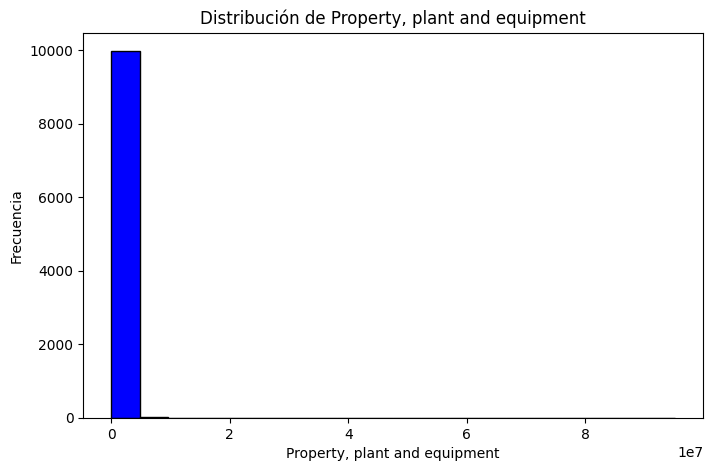

In [50]:
plt.figure(figsize=(8, 5))
plt.hist(datos['Property, plant and equipment'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de Property, plant and equipment')
plt.xlabel('Property, plant and equipment')
plt.ylabel('Frecuencia')
plt.show()

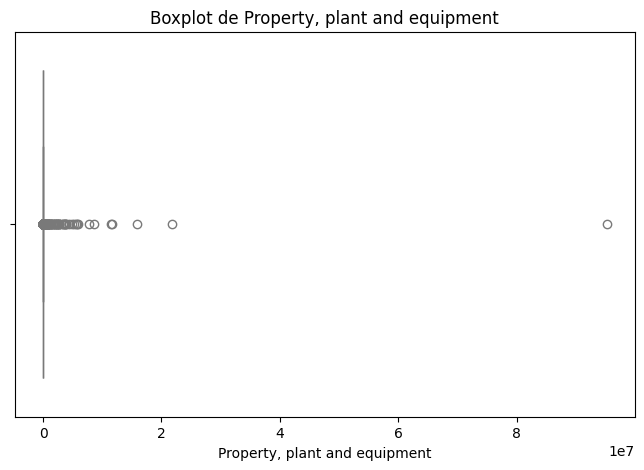

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=datos['Property, plant and equipment'], color='lightblue')
plt.title('Boxplot de Property, plant and equipment')
plt.show()

In [57]:
# Calcular el IQR
Q1 = datos['Property, plant and equipment'].quantile(0.25)
Q3 = datos['Property, plant and equipment'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 3 * IQR

# Filtrar los datos eliminando los outliers
datos_filtrados = datos[(datos['Property, plant and equipment'] >= lower_bound) & (datos['Property, plant and equipment'] <= upper_bound)]

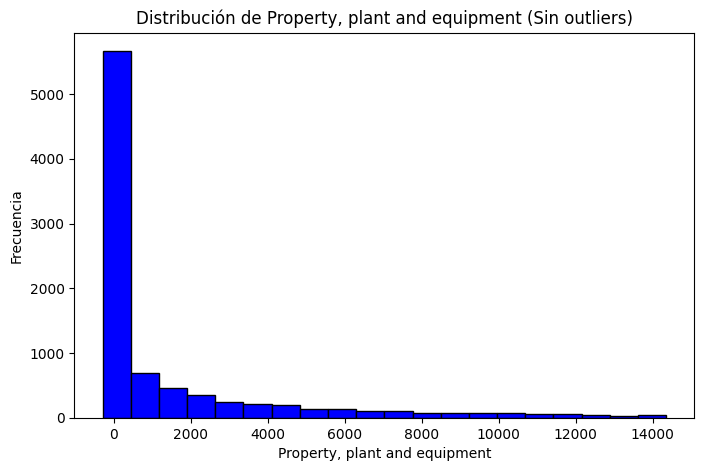

In [58]:
# Mostrar el histograma sin outliers
plt.figure(figsize=(8, 5))
plt.hist(datos_filtrados['Property, plant and equipment'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de Property, plant and equipment (Sin outliers)')
plt.xlabel('Property, plant and equipment')
plt.ylabel('Frecuencia')
plt.show()


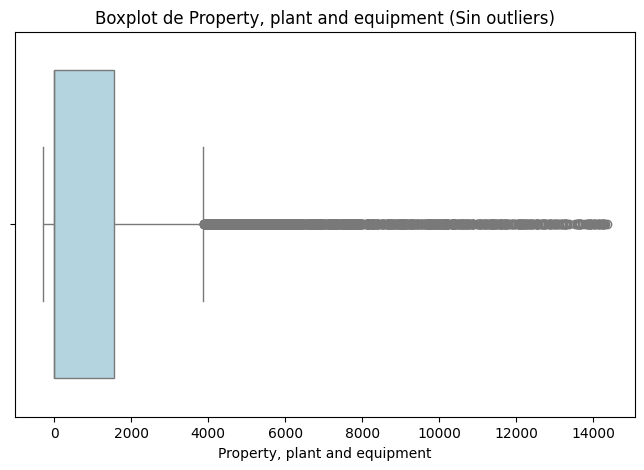

In [59]:
# Boxplot después de eliminar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=datos_filtrados['Property, plant and equipment'], color='lightblue')
plt.title('Boxplot de Property, plant and equipment (Sin outliers)')
plt.show()

In [63]:
# Eliminar valores nulos en la columna 'Property, plant and equipment' para poder calcular las estadísticas
datos_clean = datos['Property, plant and equipment'].dropna()

# Calcular la kurtosis y la asimetría nuevamente después de limpiar los datos
kurt = kurtosis(datos_clean, fisher=False)  # Fisher=False para la definición clásica
skw = skew(datos_clean)

int(kurt), int(skw)

(7366, 81)

Nos indica que existe una asimetría muy grande, especificamente hacia la derecha

## Cash and Cash Equivalents

In [64]:
datos['Cash and Cash Equivalents'].describe()

count    5.683000e+03
mean     2.601415e+04
std      4.634983e+05
min      0.000000e+00
25%      5.069800e+02
50%      1.788070e+03
75%      6.158080e+03
max      2.078178e+07
Name: Cash and Cash Equivalents, dtype: float64

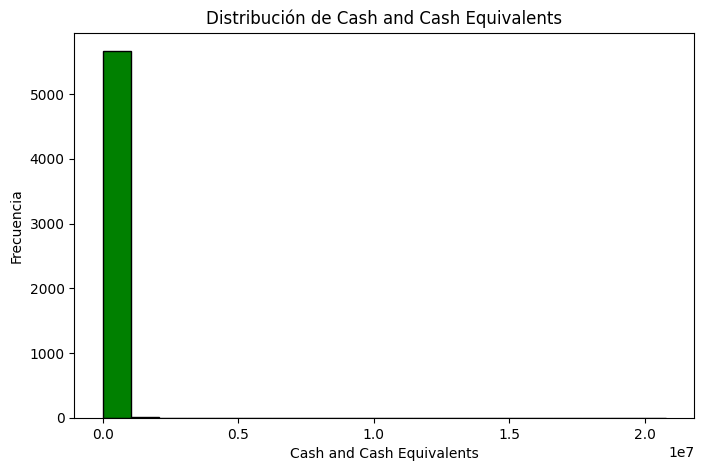

In [65]:
plt.figure(figsize=(8, 5))
plt.hist(datos['Cash and Cash Equivalents'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribución de Cash and Cash Equivalents')
plt.xlabel('Cash and Cash Equivalents')
plt.ylabel('Frecuencia')
plt.show()

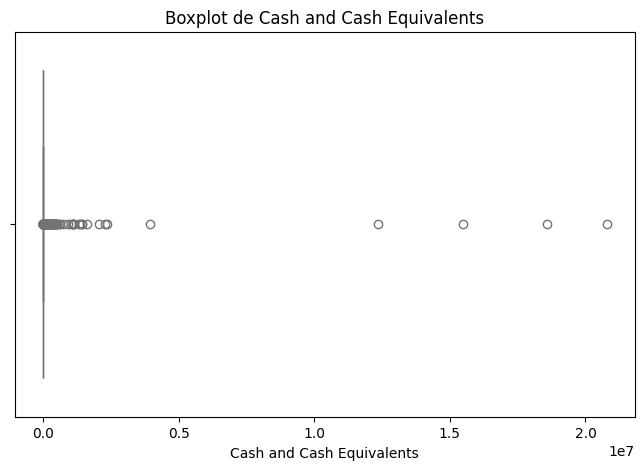

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=datos['Cash and Cash Equivalents'], color='lightgreen')
plt.title('Boxplot de Cash and Cash Equivalents')
plt.show()


In [67]:
# 3. Cálculo de la kurtosis y la asimetría (skewness)
datos_cash_clean = datos['Cash and Cash Equivalents'].dropna()

# Calcular la kurtosis
kurt_cash = kurtosis(datos_cash_clean, fisher=False)  # Fisher=False para la definición clásica
# Calcular la asimetría (skewness)
skw_cash = skew(datos_cash_clean)

print(f"Kurtosis: {kurt_cash}")
print(f"Asimetría: {skw_cash}")

Kurtosis: 1467.480840571364
Asimetría: 37.14348783374378


In [68]:
# Eliminar outliers de la columna 'Cash and Cash Equivalents' utilizando el IQR
Q1_cash = datos['Cash and Cash Equivalents'].quantile(0.25)
Q3_cash = datos['Cash and Cash Equivalents'].quantile(0.75)
IQR_cash = Q3_cash - Q1_cash

# Definir límites para eliminar los outliers
lower_bound_cash = Q1_cash - 1.5 * IQR_cash
upper_bound_cash = Q3_cash + 3 * IQR_cash

# Filtrar los datos eliminando los outliers
datos_filtrados_cash = datos[(datos['Cash and Cash Equivalents'] >= lower_bound_cash) & 
                             (datos['Cash and Cash Equivalents'] <= upper_bound_cash)]


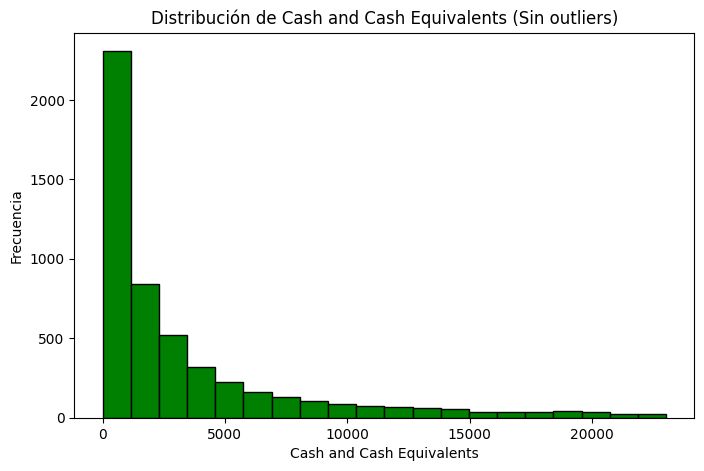

In [69]:
# Visualizar el histograma sin outliers
plt.figure(figsize=(8, 5))
plt.hist(datos_filtrados_cash['Cash and Cash Equivalents'], bins=20, color='green', edgecolor='black')
plt.title('Distribución de Cash and Cash Equivalents (Sin outliers)')
plt.xlabel('Cash and Cash Equivalents')
plt.ylabel('Frecuencia')
plt.show()

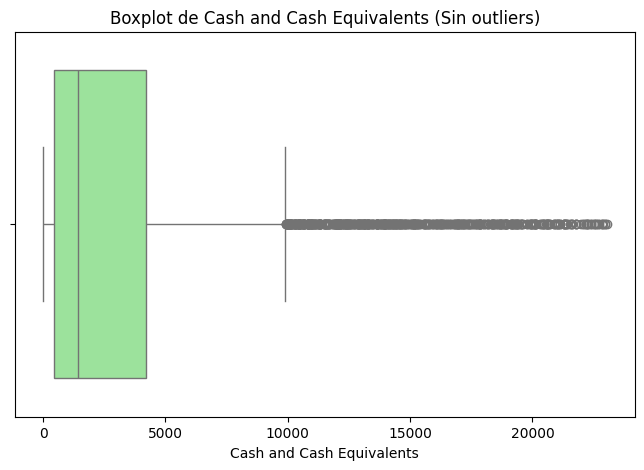

In [70]:
# Boxplot después de eliminar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=datos_filtrados_cash['Cash and Cash Equivalents'], color='lightgreen')
plt.title('Boxplot de Cash and Cash Equivalents (Sin outliers)')
plt.show()

## Net Sales Revenue Trend (%)

In [72]:
datos["Net Sales Revenue Trend (%)"].describe()

count    9.095000e+03
mean     4.588666e+02
std      1.548551e+04
min     -1.000000e+02
25%     -2.645000e+00
50%      1.271000e+01
75%      3.482000e+01
max      1.385964e+06
Name: Net Sales Revenue Trend (%), dtype: float64

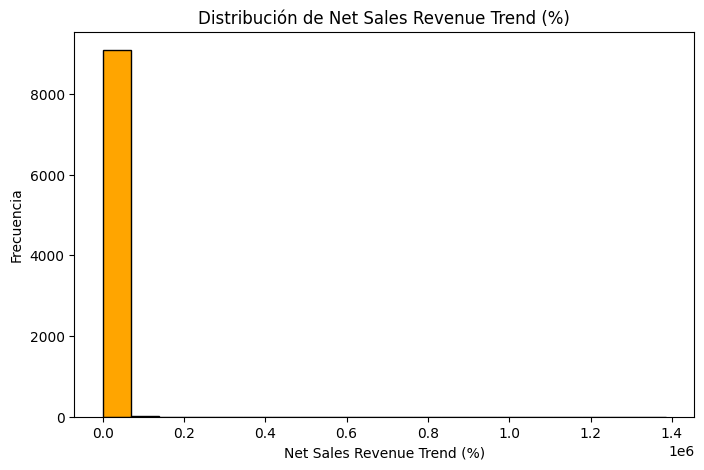

In [73]:
plt.figure(figsize=(8, 5))
plt.hist(datos['Net Sales Revenue Trend (%)'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('Distribución de Net Sales Revenue Trend (%)')
plt.xlabel('Net Sales Revenue Trend (%)')
plt.ylabel('Frecuencia')
plt.show()

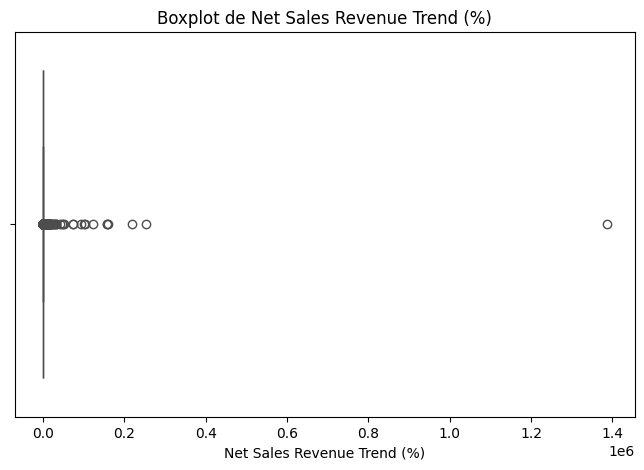

In [75]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=datos['Net Sales Revenue Trend (%)'], color='orange')
plt.title('Boxplot de Net Sales Revenue Trend (%)')
plt.show()

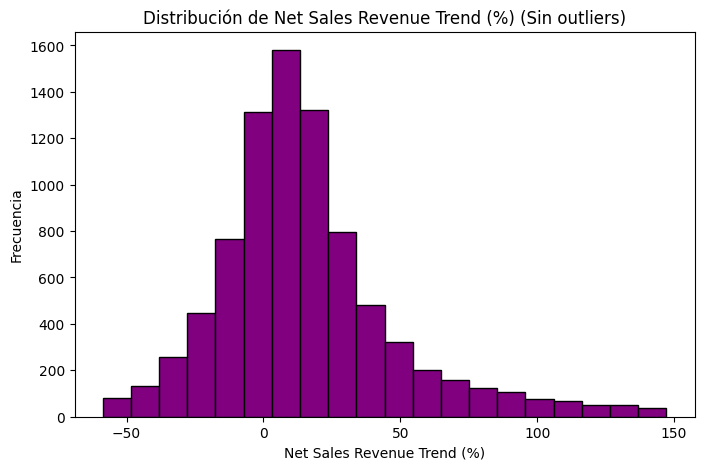

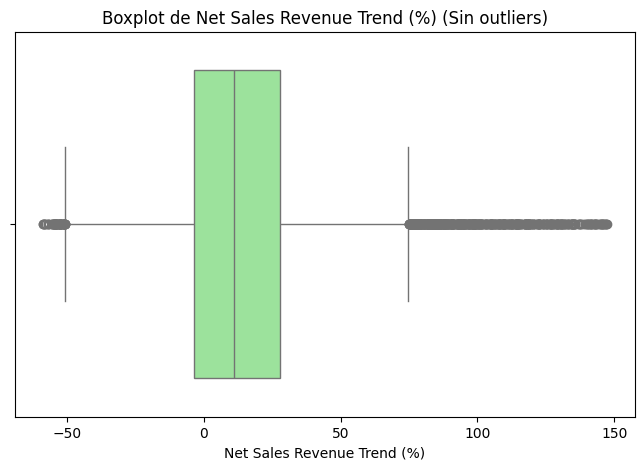

Kurtosis: 5.210733446864647
Asimetría: 1.141799347736582


In [77]:
# Eliminar outliers de la columna 'Net Sales Revenue Trend (%)' utilizando el IQR
Q1_sales = datos['Net Sales Revenue Trend (%)'].quantile(0.25)
Q3_sales = datos['Net Sales Revenue Trend (%)'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Definir límites para eliminar los outliers
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 3 * IQR_sales

# Filtrar los datos eliminando los outliers
datos_filtrados_sales = datos[(datos['Net Sales Revenue Trend (%)'] >= lower_bound_sales) & 
                             (datos['Net Sales Revenue Trend (%)'] <= upper_bound_sales)]

# Visualizar el histograma sin outliers
plt.figure(figsize=(8, 5))
plt.hist(datos_filtrados_sales['Net Sales Revenue Trend (%)'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución de Net Sales Revenue Trend (%) (Sin outliers)')
plt.xlabel('Net Sales Revenue Trend (%)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot después de eliminar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=datos_filtrados_sales['Net Sales Revenue Trend (%)'], color='lightgreen')
plt.title('Boxplot de Net Sales Revenue Trend (%) (Sin outliers)')
plt.show()

# Cálculo de la kurtosis y la asimetría (skewness)
datos_sales_clean = datos_filtrados_sales['Net Sales Revenue Trend (%)'].dropna()

# Calcular la kurtosis
kurt_sales = kurtosis(datos_sales_clean, fisher=False)  # Fisher=False para la definición clásica
# Calcular la asimetría (skewness)
skw_sales = skew(datos_sales_clean)

print(f"Kurtosis: {kurt_sales}")
print(f"Asimetría: {skw_sales}")

## Operating Profit Trend (%)

In [78]:
datos["Operating Profit Trend (%)"].describe()

count    9.101000e+03
mean     3.909004e+02
std      2.758651e+04
min     -5.336668e+05
25%     -5.263000e+01
50%     -1.020000e+00
75%      5.874000e+01
max      1.890345e+06
Name: Operating Profit Trend (%), dtype: float64

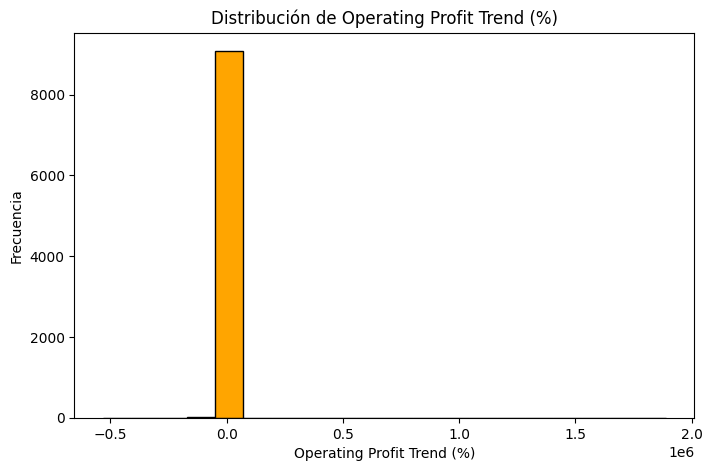

In [80]:
plt.figure(figsize=(8, 5))
plt.hist(datos['Operating Profit Trend (%)'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('Distribución de Operating Profit Trend (%)')
plt.xlabel('Operating Profit Trend (%)')
plt.ylabel('Frecuencia')
plt.show()

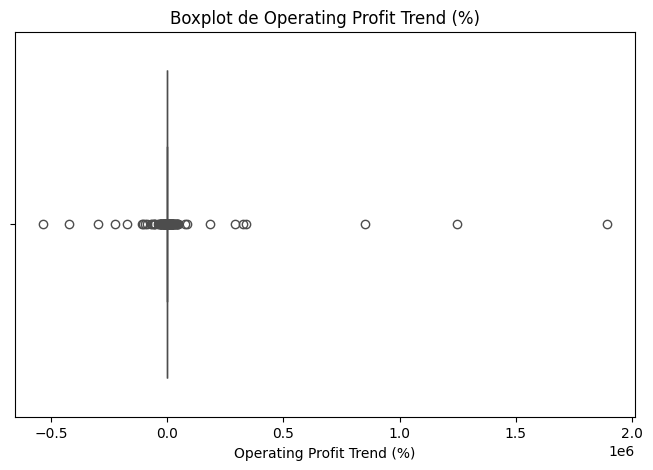

In [81]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=datos['Operating Profit Trend (%)'], color='orange')
plt.title('Boxplot de Operating Profit Trend (%)')
plt.show()

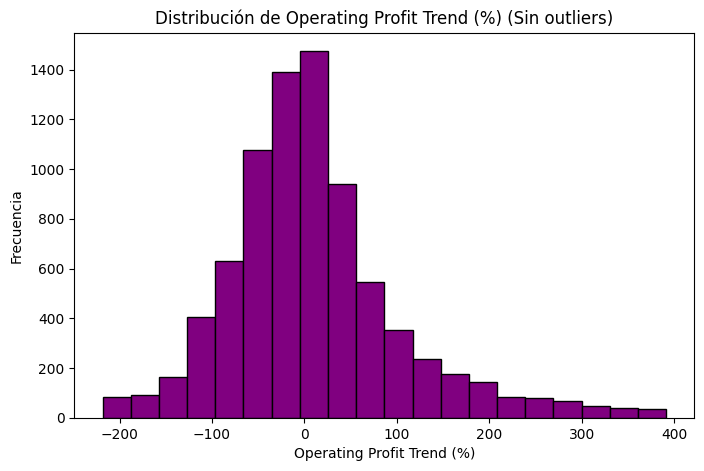

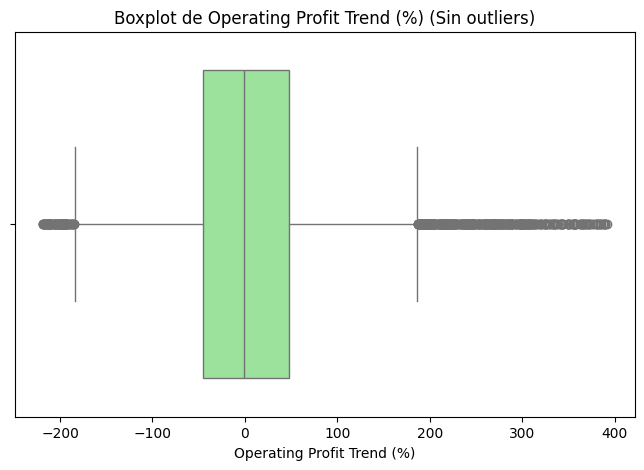

Kurtosis: 5430.08855795243
Asimetría: 70.39166071984562


In [82]:
# Eliminar outliers de la columna 'Net Sales Revenue Trend (%)' utilizando el IQR
Q1_sales = datos['Operating Profit Trend (%)'].quantile(0.25)
Q3_sales = datos['Operating Profit Trend (%)'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Definir límites para eliminar los outliers
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 3 * IQR_sales

# Filtrar los datos eliminando los outliers
datos_filtrados_profit = datos[(datos['Operating Profit Trend (%)'] >= lower_bound_sales) & 
                             (datos['Operating Profit Trend (%)'] <= upper_bound_sales)]

# Visualizar el histograma sin outliers
plt.figure(figsize=(8, 5))
plt.hist(datos_filtrados_profit['Operating Profit Trend (%)'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución de Operating Profit Trend (%) (Sin outliers)')
plt.xlabel('Operating Profit Trend (%)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot después de eliminar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=datos_filtrados_profit['Operating Profit Trend (%)'], color='lightgreen')
plt.title('Boxplot de Operating Profit Trend (%) (Sin outliers)')
plt.show()

# Cálculo de la kurtosis y la asimetría (skewness)
datos_profit_clean = datos_filtrados_sales['Operating Profit Trend (%)'].dropna()

# Calcular la kurtosis
kurt_sales = kurtosis(datos_profit_clean, fisher=False)  # Fisher=False para la definición clásica
# Calcular la asimetría (skewness)
skw_sales = skew(datos_profit_clean)

print(f"Kurtosis: {kurt_sales}")
print(f"Asimetría: {skw_sales}")

## Paises de importación y exportación

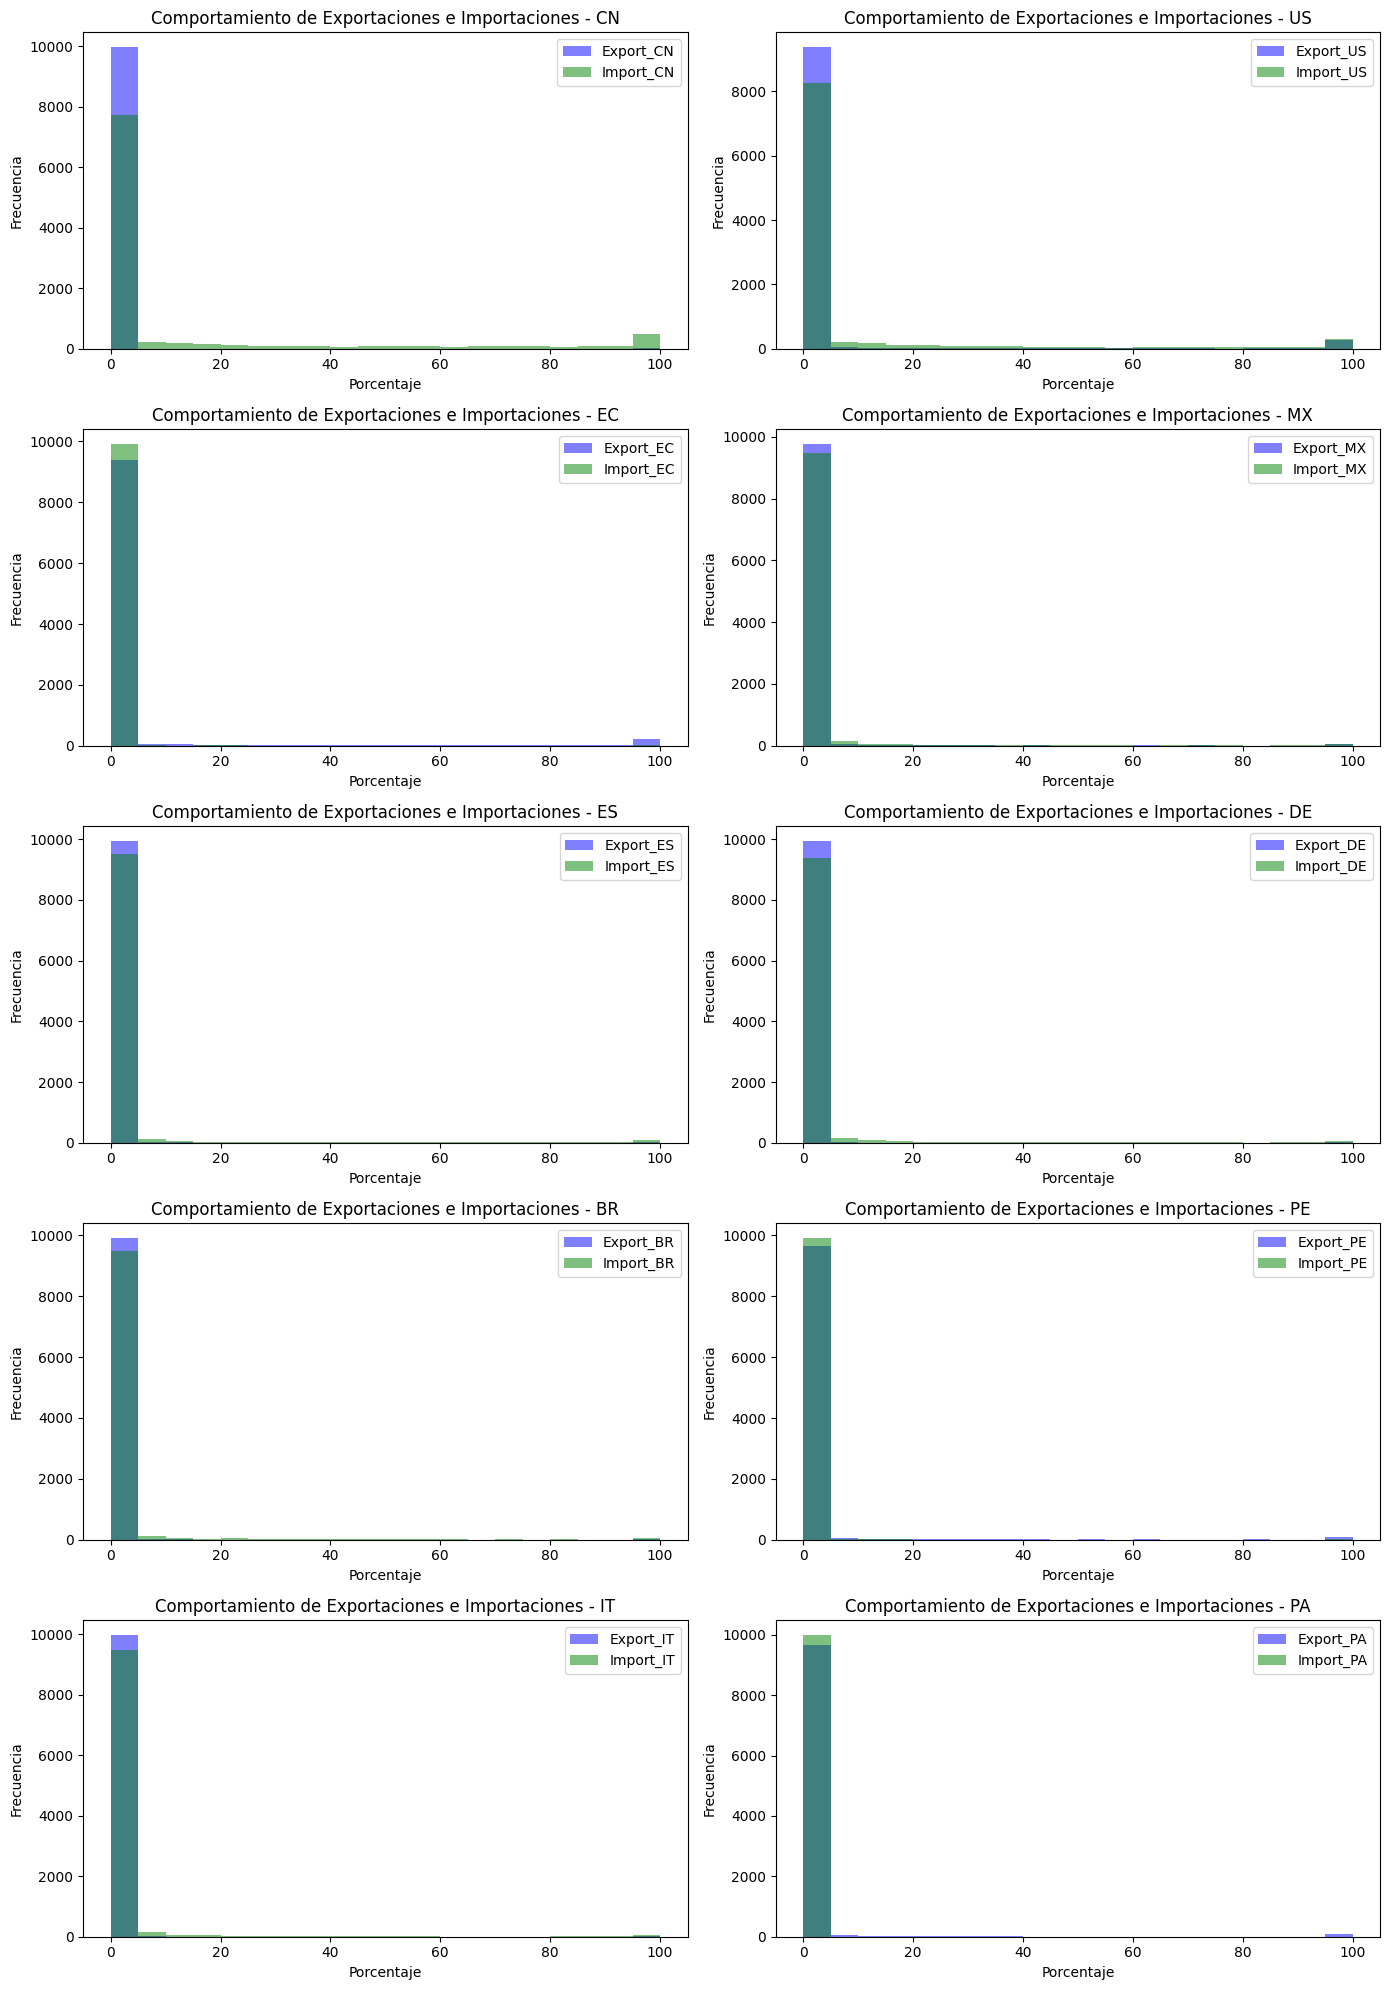

In [87]:

# Obtener las columnas de exportación e importación del top 10 de países
top_10_export_columns = [col for col in datos.columns if 'Export_' in col]
top_10_import_columns = [col for col in datos.columns if 'Import_' in col]

# Crear un gráfico combinado de subplots para exportaciones e importaciones por país
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  # 5 filas, 2 columnas

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()

# Iterar sobre las columnas de exportación e importación y graficar
for i, (export_col, import_col) in enumerate(zip(top_10_export_columns, top_10_import_columns)):
    # Histograma de exportaciones
    axes[i].hist(datos[export_col].dropna(), bins=20, alpha=0.5, label=f'{export_col}', color='blue')
    
    # Histograma de importaciones
    axes[i].hist(datos[import_col].dropna(), bins=20, alpha=0.5, label=f'{import_col}', color='green')
    
    # Título y etiquetas
    country_name = export_col.split("_")[1]  # Obtener el nombre del país
    axes[i].set_title(f'Comportamiento de Exportaciones e Importaciones - {country_name}')
    axes[i].set_xlabel('Porcentaje')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend(loc='upper right')

# Ajustar el layout
plt.tight_layout()
plt.show()

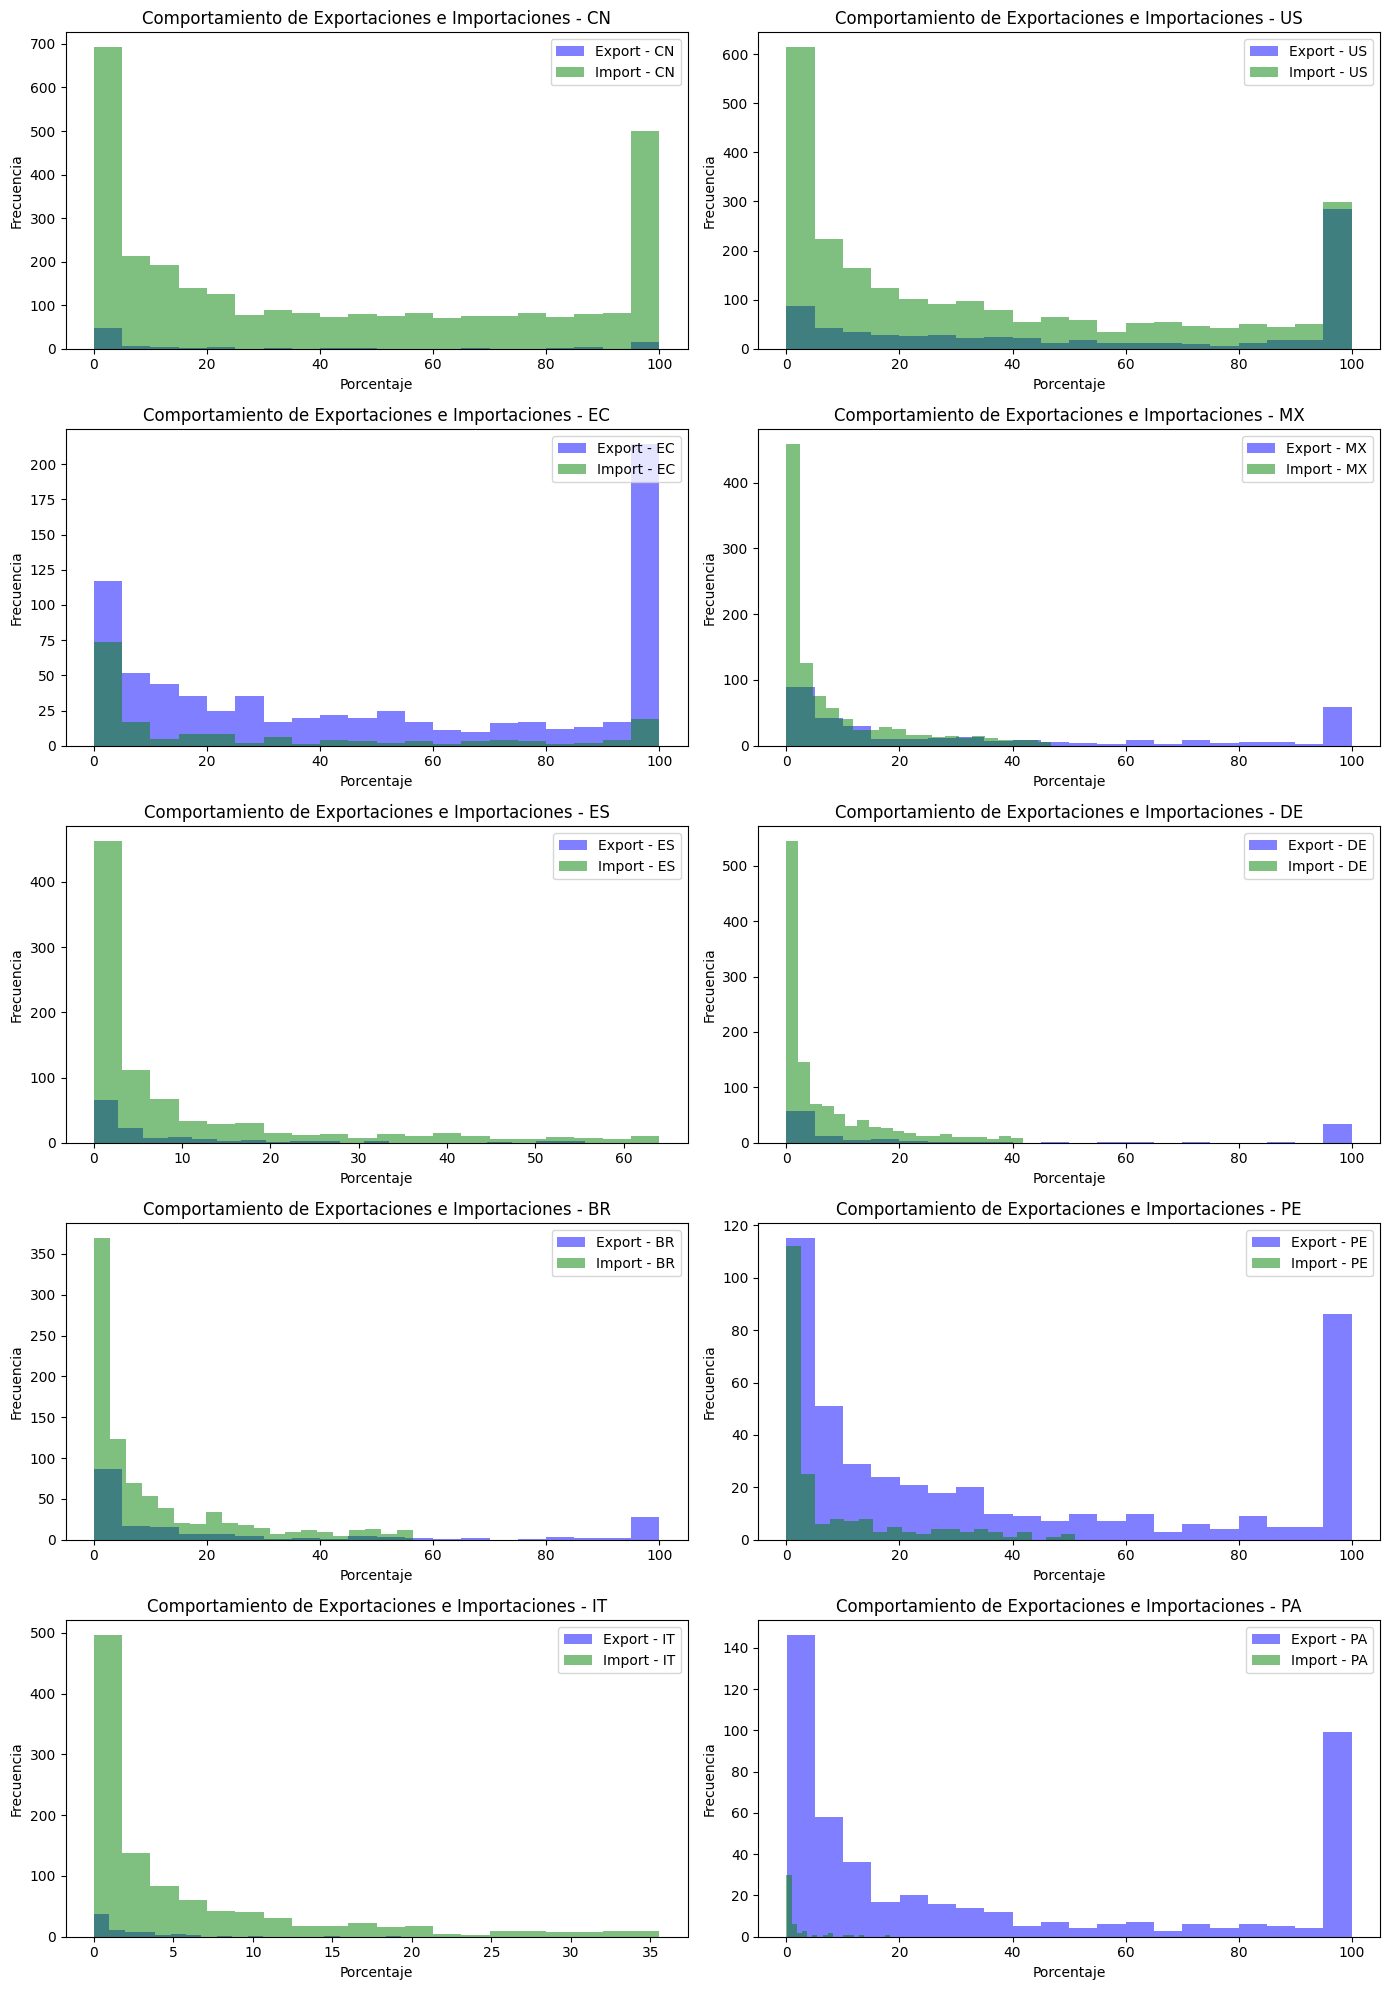

In [88]:
# Función para eliminar outliers utilizando el IQR (Rango Intercuartílico)
def remove_outliers_iqr(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_column[(data_column >= lower_bound) & (data_column <= upper_bound)]

# Función para eliminar valores en cero
def remove_zero_values(data_column):
    return data_column[data_column != 0]

# Obtener las columnas de exportación e importación del top 10 de países
top_10_export_columns = [col for col in datos.columns if 'Export_' in col]
top_10_import_columns = [col for col in datos.columns if 'Import_' in col]

# Crear un gráfico combinado de subplots para exportaciones e importaciones por país
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  # 5 filas, 2 columnas

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()

# Iterar sobre las columnas de exportación e importación, eliminar outliers y graficar
for i, (export_col, import_col) in enumerate(zip(top_10_export_columns, top_10_import_columns)):
    # Limpiar los datos: eliminar outliers y valores en cero
    export_data_clean = remove_outliers_iqr(remove_zero_values(datos[export_col].dropna()))
    import_data_clean = remove_outliers_iqr(remove_zero_values(datos[import_col].dropna()))
    
    # Histograma de exportaciones
    axes[i].hist(export_data_clean, bins=20, alpha=0.5, label=f'Export - {export_col.split("_")[1]}', color='blue')
    
    # Histograma de importaciones
    axes[i].hist(import_data_clean, bins=20, alpha=0.5, label=f'Import - {import_col.split("_")[1]}', color='green')
    
    # Título y etiquetas
    country_name = export_col.split("_")[1]  # Obtener el nombre del país
    axes[i].set_title(f'Comportamiento de Exportaciones e Importaciones - {country_name}')
    axes[i].set_xlabel('Porcentaje')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend(loc='upper right')

# Ajustar el layout
plt.tight_layout()
plt.show()